## Paqueterias

In [35]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Función de Pagos

In [ ]:
def calcular_pagos(jugador1, jugador2):
    cuenta1 = []
    cuenta2 = []
    puntos1 = 0
    puntos2 = 0

    for i in range(len(jugador1)):
        play1 = jugador1[i]
        play2 = jugador2[i]

        if play1 == 1 and play2 == 1: 
            puntos1 += 3
            puntos2 += 3
        elif play1 == 1 and play2 == 0:
            puntos1 += 0
            puntos2 += 5
        elif play1 == 0 and play2 == 1:
            puntos1 += 5
            puntos2 += 0    
        else:
            puntos1 += 1
            puntos2 += 1

        cuenta1.append(puntos1)
        cuenta2.append(puntos2)
    return cuenta1, cuenta2

def grafica_pagos(df, nombres, j_fijo):
    plt.figure(figsize=(12, 8))

    for i in range(len(nombres)):
        plt.subplot(2, 3, i + 1)
        plt.plot(df[i]['Ronda'], df[i][f'Pago {j_fijo}'], label=f'Pago {j_fijo}', color='orange')
        plt.plot(df[i]['Ronda'], df[i][f'Pago {nombres[i]}'], label=f'Pago {nombres[i]}', color='cornflowerblue')
        plt.title(f'{j_fijo} vs {nombres[i]}')
        plt.xlabel('Ronda')
        plt.ylabel('Pago')
        plt.legend()

    plt.tight_layout()
    plt.show()

def graficar_ganancias(df, nombres):
    jugadores = []
    total = []

    for i in range(len(df)):
        nombre = nombres[i]
        jugadores.append(nombre)
        total.append(df[i][f'Pago {nombre}'].iloc[-1])

    plt.figure(figsize=(10, 6))
    plt.bar(jugadores, total, color='skyblue')
    plt.title('Ganancias acumuladas por jugador')
    plt.ylabel('Ganancias')
    plt.xlabel('Jugador')
    plt.show()


   

## Jugadores

In [37]:
random.seed(42)
aleatorio = []

for i in range(1000):
    aleatorio.append(np.random.randint(0,2))

def Rick (aleatorio):
    Rick_play = []
    ceros_Rick = 0

    for i in range(0, len(aleatorio)):   
        if i == 0:
            Rick_play.append(1)
        elif ceros_Rick >= 2:
            Rick_play.append(0)
        else:
            Rick_play.append(aleatorio[i-1])
            if aleatorio[i]==0:
                ceros_Rick +=1
            else:
                ceros_Rick = 0
    return Rick_play

def Friedman (aleatorio):
    Friedman_play = []
    ceros_friedman = 0 

    for i in range(0, len(aleatorio)):  
        if  i == 0:
            Friedman_play.append(1) 
        elif ceros_friedman > 0:
            Friedman_play.append(0)  
        else:
            Friedman_play.append(aleatorio[i-1])  
        if aleatorio[i] == 0:
            ceros_friedman +=1
    return Friedman_play

def Joss (aleatorio):
    Joss_play = []

    for i in range(0, len(aleatorio)):
        if i == 0:
            Joss_play.append(1)
        elif (i + 1) % 10 == 0:
            Joss_play.append(0)
        else:
            Joss_play.append(aleatorio[i - 1])
    return Joss_play

def GraasKamp (aleatorio):
    GraasKamp_play = []

    for i in range(0, len(aleatorio)):
        if i == 0:
            GraasKamp_play.append(1)
        elif (i + 1) % 20 == 0:
            GraasKamp_play.append(0)
        else:
            GraasKamp_play.append(aleatorio[i - 1])
    return GraasKamp_play

def Tit_for_Tat (aleatorio):
    Tit_for_tat_play= []
    
    for i in range(0, len(aleatorio)):
        if i == 0:
            Tit_for_tat_play.append(1)
        else:
            Tit_for_tat_play.append(aleatorio[i -1])
    return Tit_for_tat_play

def Tester (aleatorio):
    Tester_plays = []
    Tester_plays.append(0)
    Tester_plays.append(1)  
    if aleatorio[1] == 0:
        for i in range(2, len(aleatorio)):
            Tester_plays.append(aleatorio[i - 1])
    else:
        for i in range(2, len(aleatorio)):
            Tester_plays.append((i-2) % 2) 
    return Tester_plays

#def Tit_for_2Tat (aleatorio):
    Tit_for_2Tat_play = []
    ceros = 0
    
    for i in range(0, len(aleatorio)+1):
        if i == 0:
            Tit_for_2Tat_play.append(1)
        elif aleatorio[i - 1] == 0:
            ceros += 1
        else :
            ceros = 0
        if ceros == 2:
            Tit_for_2Tat_play.append(1)  
            ceros = 0  
        else:
            Tit_for_2Tat_play.append(aleatorio[i - 1])  

    return Tit_for_2Tat_play

In [38]:
dataframe = pd.DataFrame ({
    'Aleatorio': aleatorio,
    'Friedman': Tester(aleatorio)
}).T
dataframe

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Aleatorio,1,0,0,0,0,0,1,0,1,0,...,1,1,1,1,0,0,0,1,1,0
Friedman,0,1,0,0,0,0,0,1,0,1,...,0,1,1,1,1,0,0,0,1,1


## Todos vs Aleatorio

In [39]:
nombres_aleatorio = ['Rick', 'Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester']
jugadores = [Rick, Friedman, Joss, GraasKamp, Tit_for_Tat, Tester]

df_aleatorio = []

for i in range(len(nombres_aleatorio)):
    player = nombres_aleatorio[i]
    funcion = jugadores[i]
    
    jugadas = funcion(aleatorio)
    
    pagosj1, pagosj2 = calcular_pagos(aleatorio, jugadas)
    
    df2 = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Aleatorio': aleatorio,
        player: jugadas,
        'Pago Aleatorio': pagosj1,
        f'Pago {player}': pagosj2
    })
    
    df_aleatorio.append(df2)

df_aleatorio[0]



,Ronda,Aleatorio,Rick,Pago Aleatorio,Pago Rick
0,1,1,1,3,3
1,2,0,1,8,3
2,3,0,0,9,4
3,4,0,0,10,5
4,5,0,0,11,6
...,...,...,...,...,...
995,996,0,0,492,3037
996,997,0,0,493,3038
997,998,1,0,493,3043
998,999,1,0,493,3048


## Gráficas

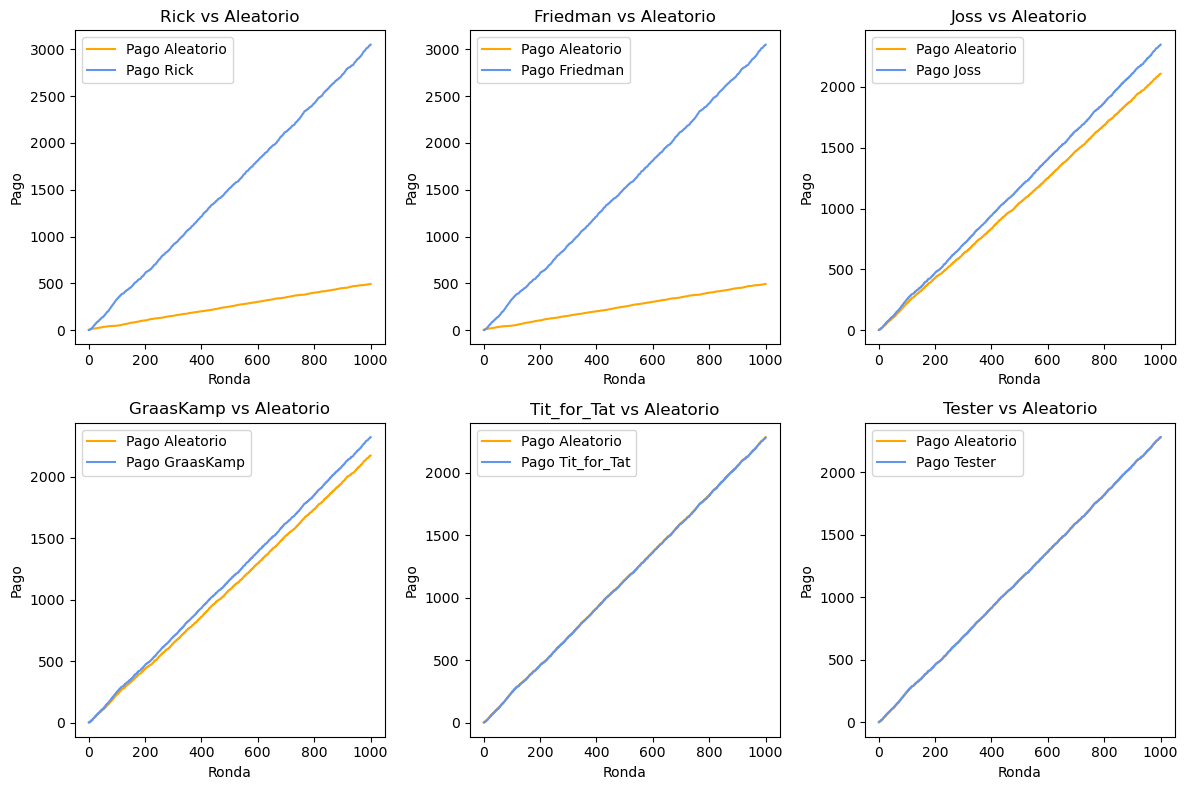

In [40]:
def grafica_pagos_aleatorio (df_aleatorio, nombres_aleatorio):
    plt.figure(figsize=(12, 8))

    for i in range(len(nombres_aleatorio)):
        plt.subplot(2, 3, i+1)
        plt.plot(df_aleatorio[i]['Ronda'], df_aleatorio[i]['Pago Aleatorio'], label='Pago Aleatorio', color='orange')
        plt.plot(df_aleatorio[i]['Ronda'], df_aleatorio[i][f'Pago {nombres_aleatorio[i]}'], label=f'Pago {nombres_aleatorio[i]}', color='cornflowerblue')
        plt.title(f'{nombres_aleatorio[i]} vs Aleatorio')
        plt.xlabel('Ronda')
        plt.ylabel('Pago')
        plt.legend()

    plt.tight_layout()
    plt.show()

grafica_pagos_aleatorio(df_aleatorio, nombres_aleatorio)

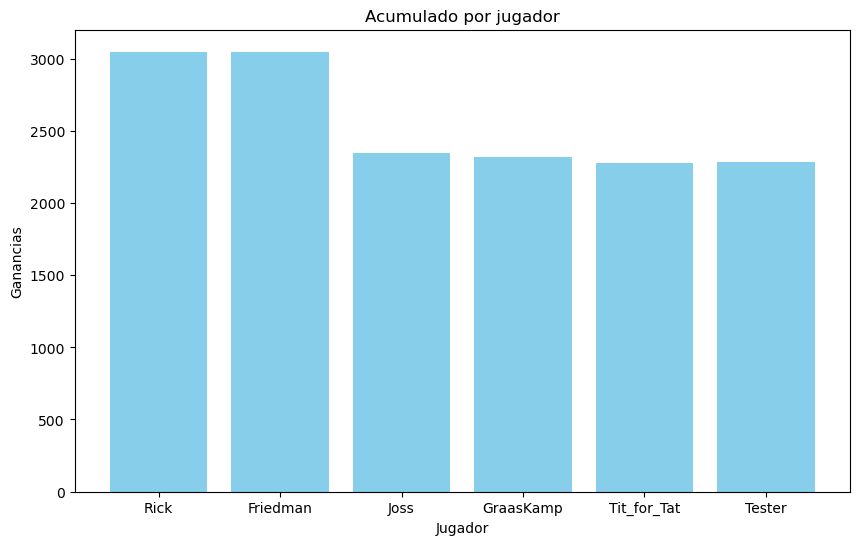

In [41]:
def graficar_ganancias(df_aleatorio, nombres_aleatorio):
    jugadores = []
    total = []

    for i in range(len(df_aleatorio)):
        nombre = nombres_aleatorio[i]
        jugadores.append(nombre)
        total.append(df_aleatorio[i][f'Pago {nombre}'].iloc[-1])

    plt.figure(figsize=(10, 6))
    plt.bar(jugadores, total, color='skyblue')
    plt.title('Acumulado por jugador')
    plt.ylabel('Ganancias')
    plt.xlabel('Jugador')
    plt.show()

graficar_ganancias(df_aleatorio, nombres_aleatorio)

## Todos vs Rick

In [42]:
Rick_game = Rick(aleatorio)

nombres_Rick = ['Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester']
oponentes_Rick = [Friedman, Joss, GraasKamp, Tit_for_Tat, Tester]

df_Rick = []

for i in range(len(nombres_Rick)):
    nombre = nombres_Rick[i]
    funcion = oponentes_Rick[i]

    plays_op = funcion(Rick_game)  
    pagos_Rick, pagos_oponente = calcular_pagos(Rick_game, plays_op)

    df2_Rick = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Rick': Rick_game,
        nombre: plays_op,
        'Pago Rick': pagos_Rick,
        f'Pago {nombre}': pagos_oponente
    })

    df_Rick.append(df2_Rick)

df_Rick[1]


,Ronda,Rick,Joss,Pago Rick,Pago Joss
0,1,1,1,3,3
1,2,1,1,6,6
2,3,0,1,11,6
3,4,0,0,12,7
4,5,0,0,13,8
...,...,...,...,...,...
995,996,0,0,1004,999
996,997,0,0,1005,1000
997,998,0,0,1006,1001
998,999,0,0,1007,1002


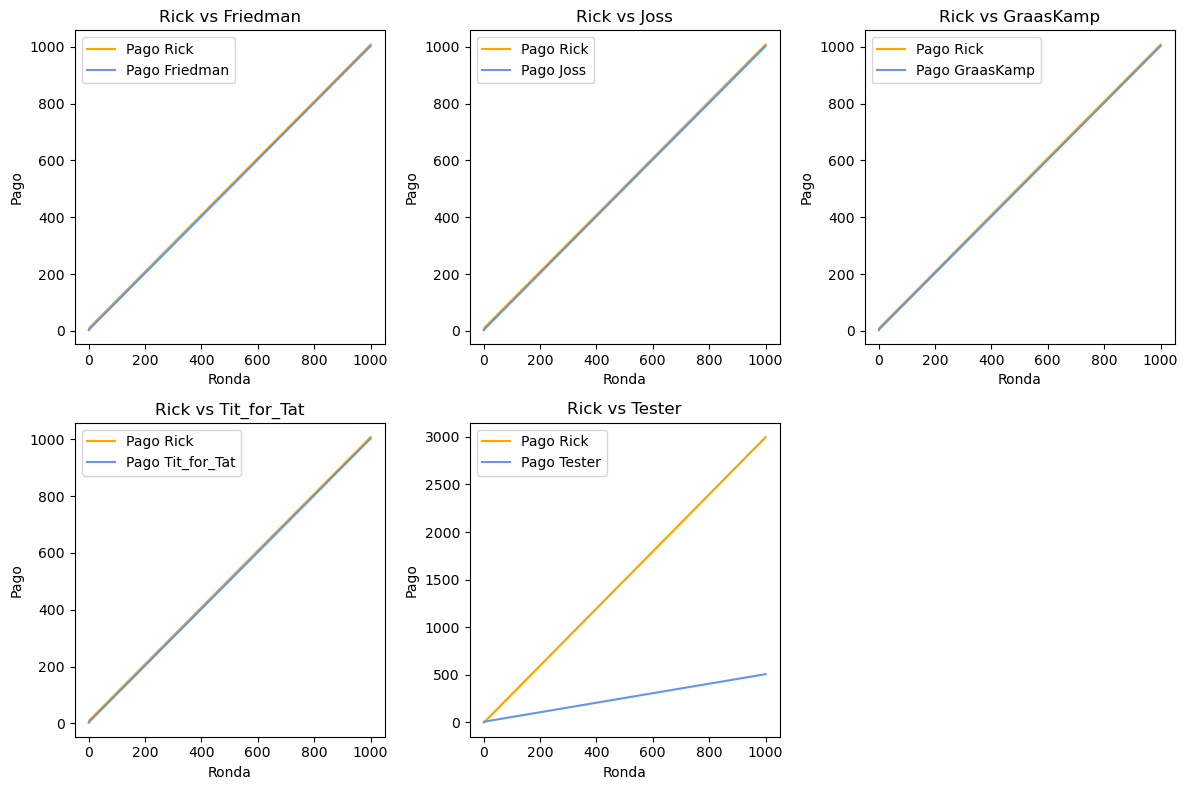

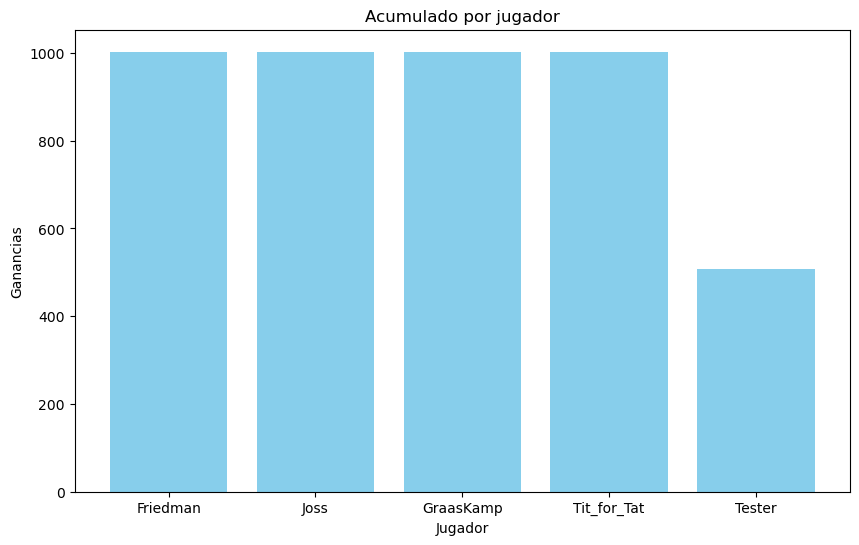

In [43]:
grafica_pagos(df_Rick, nombres_Rick, 'Rick')
graficar_ganancias(df_Rick, nombres_Rick)

## Todos vs Friedman

In [44]:
Friedman_game = Friedman(aleatorio)

nombres_Friedman = ['Rick', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester']
oponentes_Friedman = [Rick, Joss, GraasKamp, Tit_for_Tat, Tester]

df_Friedman = []

for i in range(len(nombres_Friedman)):
    nombre = nombres_Friedman[i]
    funcion = oponentes_Friedman[i]

    plays_op = funcion(Friedman_game)  
    pagos_Friedman, pagos_oponente = calcular_pagos(Friedman_game, plays_op)

    df2_Friedman = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Friedman': Friedman_game,
        nombre: plays_op,
        'Pago Friedman': pagos_Friedman,
        f'Pago {nombre}': pagos_oponente
    })

    df_Friedman.append(df2_Friedman)

df_Friedman[1]

,Ronda,Friedman,Joss,Pago Friedman,Pago Joss
0,1,1,1,3,3
1,2,1,1,6,6
2,3,0,1,11,6
3,4,0,0,12,7
4,5,0,0,13,8
...,...,...,...,...,...
995,996,0,0,1004,999
996,997,0,0,1005,1000
997,998,0,0,1006,1001
998,999,0,0,1007,1002


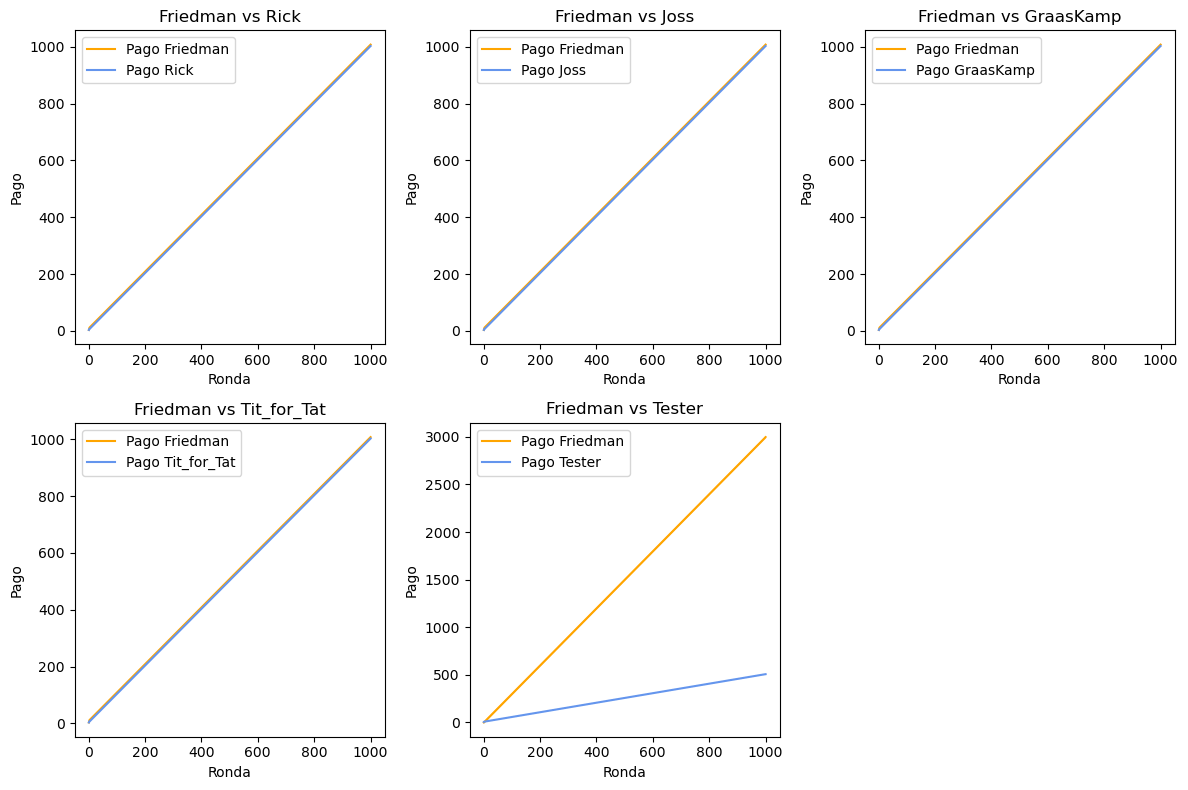

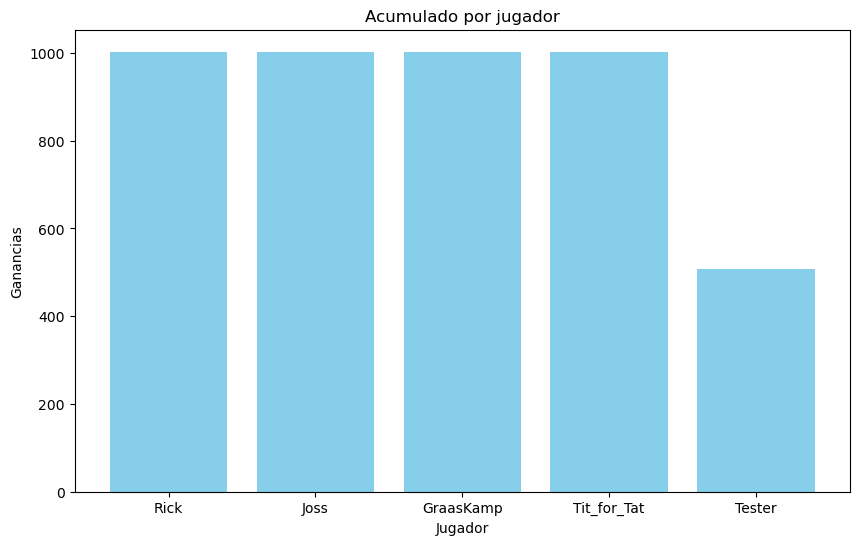

In [45]:
grafica_pagos(df_Friedman, nombres_Friedman, 'Friedman')
graficar_ganancias(df_Friedman, nombres_Friedman)

## Todos vs Joss

In [46]:
Joss_game = Joss(aleatorio)

nombres_Joss = ['Rick', 'Friedman', 'GraasKamp', 'Tit_for_Tat', 'Tester']
oponentes_Joss = [Rick, Friedman, GraasKamp, Tit_for_Tat, Tester]

df_Joss = []

for i in range(len(nombres_Joss)):
    nombre = nombres_Joss[i]
    funcion = oponentes_Joss[i]

    plays_op = funcion(Joss_game)  
    pagos_Joss, pagos_oponente = calcular_pagos(Joss_game, plays_op)

    df2_Joss = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Joss': Joss_game,
        nombre: plays_op,
        'Pago Joss': pagos_Joss,
        f'Pago {nombre}': pagos_oponente
    })

    df_Joss.append(df2_Joss)

df_Joss[1]

,Ronda,Joss,Friedman,Pago Joss,Pago Friedman
0,1,1,1,3,3
1,2,1,1,6,6
2,3,0,1,11,6
3,4,0,0,12,7
4,5,0,0,13,8
...,...,...,...,...,...
995,996,0,0,542,2847
996,997,0,0,543,2848
997,998,0,0,544,2849
998,999,1,0,544,2854


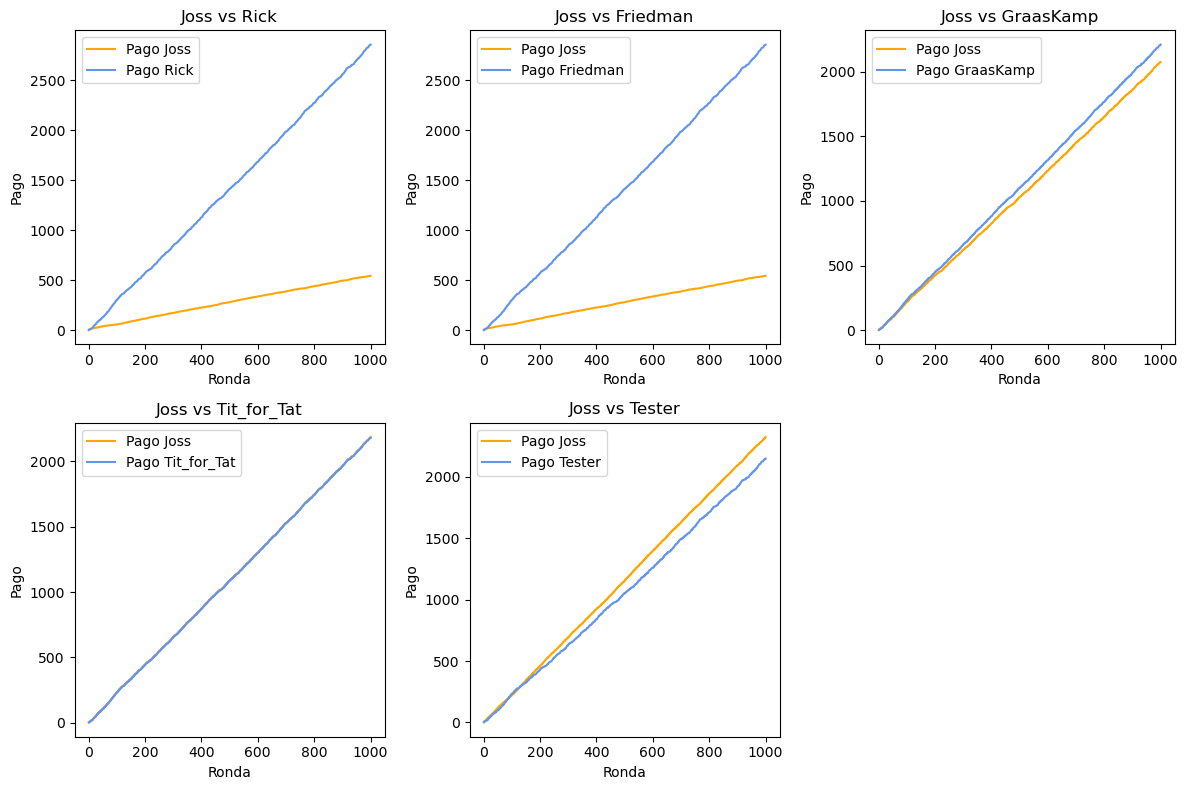

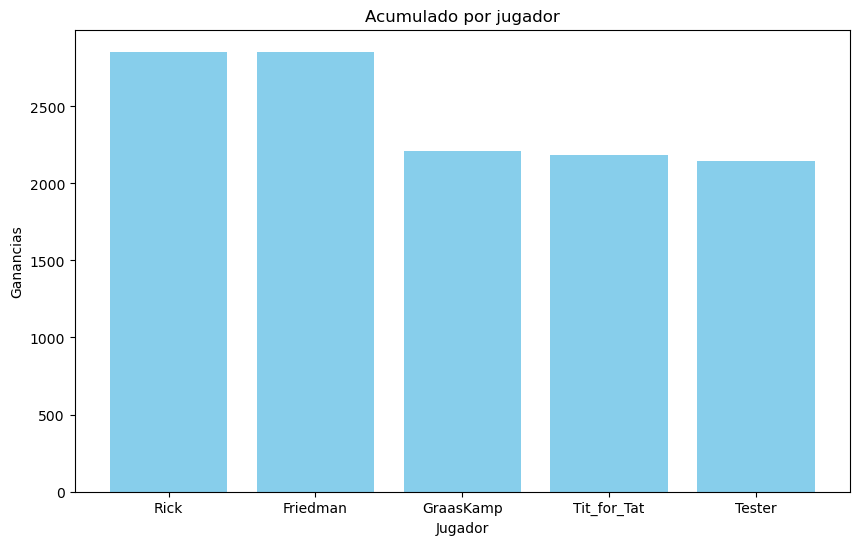

In [47]:
grafica_pagos(df_Joss, nombres_Joss, 'Joss')
graficar_ganancias(df_Joss, nombres_Joss)

## Todos vs GraasKamp

In [49]:
GraasKamp_game = GraasKamp(aleatorio)

nombres_GraasKamp = ['Rick', 'Friedman', 'Joss', 'Tit_for_Tat', 'Tester']
oponentes_GraasKamp = [Rick, Friedman, Joss, Tit_for_Tat, Tester]

df_GraasKamp = []

for i in range(len(nombres_GraasKamp)):
    nombre = nombres_GraasKamp[i]
    funcion = oponentes_GraasKamp[i]

    plays_op = funcion(GraasKamp_game)  
    pagos_GraasKamp, pagos_oponente = calcular_pagos(GraasKamp_game, plays_op)

    df2_GraasKamp = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'GraasKamp': GraasKamp_game,
        nombre: plays_op,
        'Pago GraasKamp': pagos_GraasKamp,
        f'Pago {nombre}': pagos_oponente
    })

    df_GraasKamp.append(df2_GraasKamp)

df_GraasKamp[4]

,Ronda,GraasKamp,Tester,Pago GraasKamp,Pago Tester
0,1,1,0,0,5
1,2,1,1,3,8
2,3,0,0,4,9
3,4,0,1,9,9
4,5,0,0,10,10
...,...,...,...,...,...
995,996,0,1,2276,2196
996,997,0,0,2277,2197
997,998,0,1,2282,2197
998,999,1,0,2282,2202


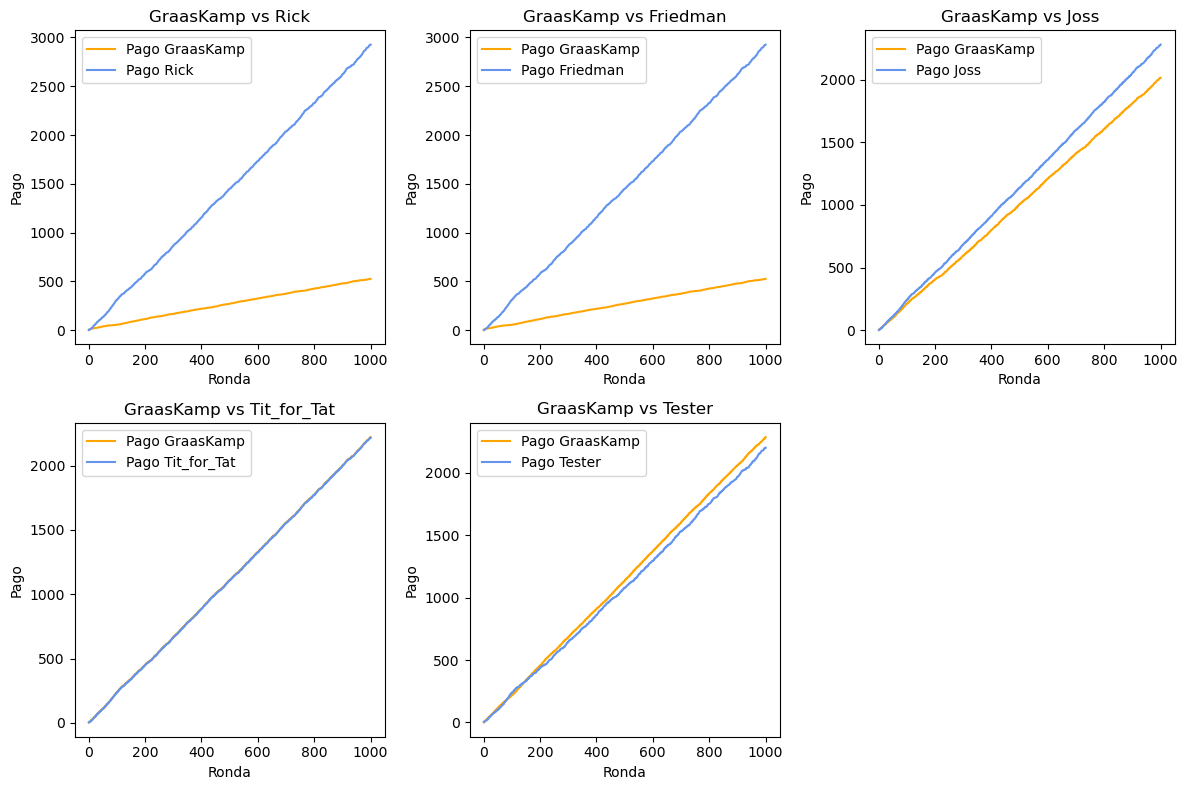

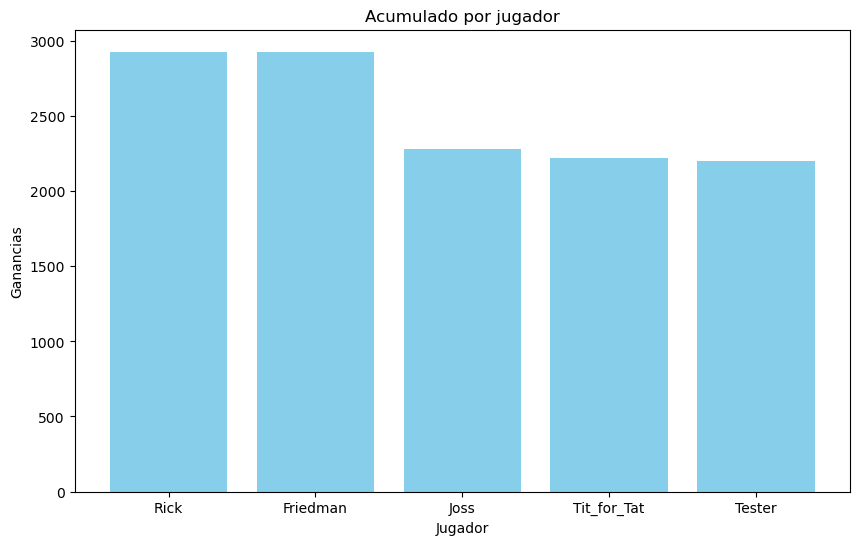

In [50]:
grafica_pagos(df_GraasKamp, nombres_GraasKamp, 'GraasKamp')
graficar_ganancias(df_GraasKamp, nombres_GraasKamp)